La regresión logística o Logistic Regression es un algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 – 0, sí – no, abierto – cerrado, etc.

El resultado o variable objetivo es de naturaleza dicotómica. Dicotómica significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer o calcular la probabilidad de que ocurra un evento.

La regresión logística es uno de los algoritmos de Machine Learning más simples y más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. Describe y estima la relación entre una variable binaria dependiente y las variables independientes.

In [15]:
import pandas as pd
datos = pd.read_csv("DataSet.csv")

In [16]:
datos.head()

,Sucursal,Ciudad,TipoCliente,Género,LineaProducto,PrecioUnitario,Cantidad,Impuesto5%,Total,Fecha,Hora,MetodoPago,Calificación
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [17]:
datos.describe()

,PrecioUnitario,Cantidad,Impuesto5%,Total,Calificación
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


<Axes: xlabel='Cantidad', ylabel='count'>

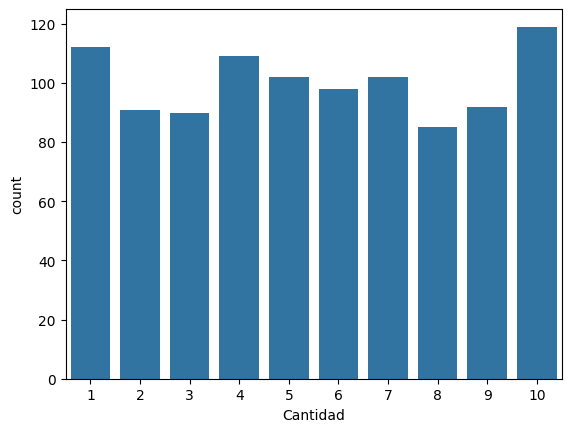

In [18]:
import seaborn as sb
sb.countplot(x="Cantidad", data=datos)

<Axes: xlabel='Cantidad', ylabel='count'>

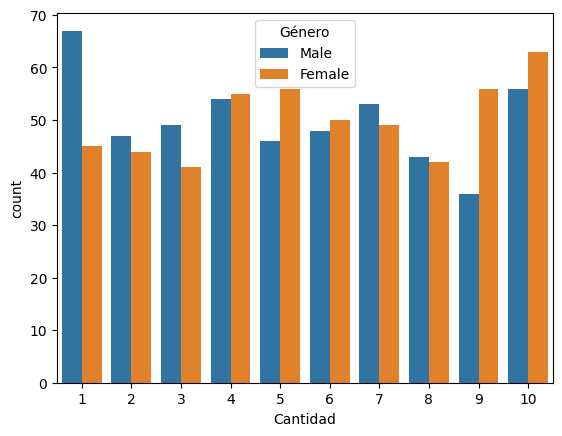

In [10]:
sb.countplot(x="Cantidad", data=datos, hue="")

In [11]:
datos.isna().sum()

,0
Sucursal,0
Ciudad,0
TipoCliente,0
Género,0
LineaProducto,0
PrecioUnitario,0
Cantidad,0
Impuesto5%,0
Total,0
Fecha,0


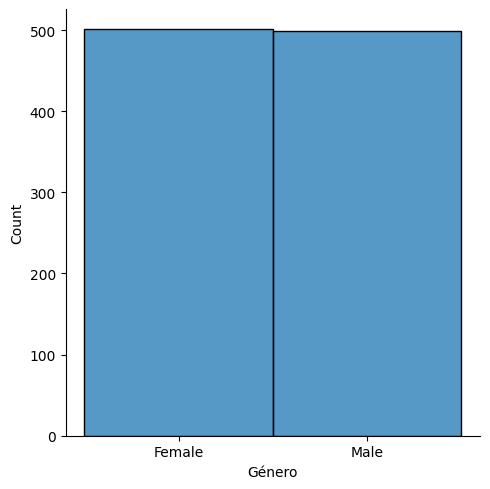

In [12]:
sb.displot(x="Género", data=datos)

In [13]:
datos["Género"].value_counts()

,count
Género,
Female,501
Male,499


In [14]:
datos["Género"].mean()

TypeError: Could not convert string 'FemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemale' to numeric

In [ ]:
datos["Age"].fillna(datos["Age"].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [ ]:
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Eliminando la columna Cabin del dataframe datos.
# El argumento axis=1 especifica que estamos eliminando una columna.
# Los cambios se guardan en el dataframe datos.
datos = datos.drop(["Cabin"], axis=1)

In [ ]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
datos = datos.dropna()

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Elimina las columnas Name, PassengerId y Ticket del DataFrame datos.
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [ ]:
# Esta línea de código utiliza pd.get_dummies para realizar una codificación one-hot en la columna Sex
# del DataFrame datos. La codificación one-hot transforma las variables categóricas
# en una representación numérica que se puede utilizar en los modelos de aprendizaje automático.
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

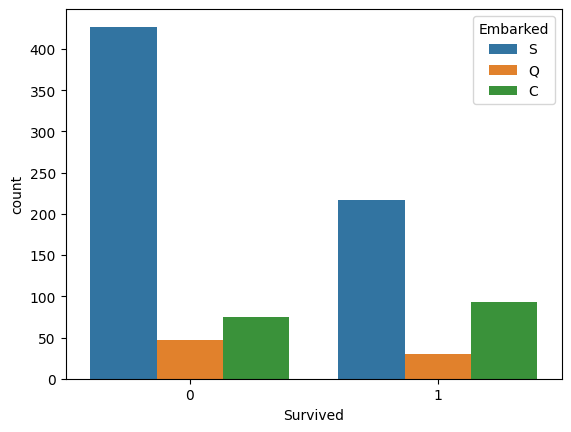

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [ ]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

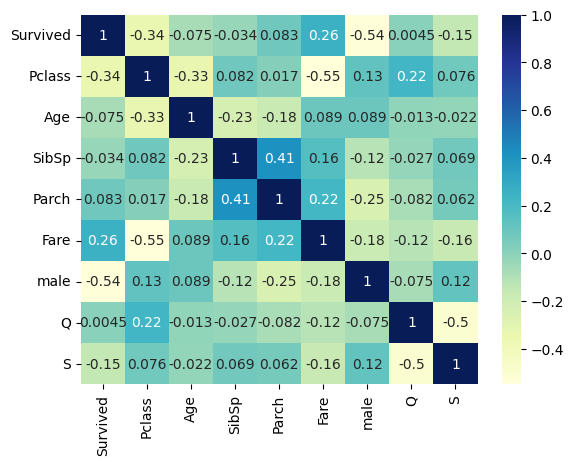

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

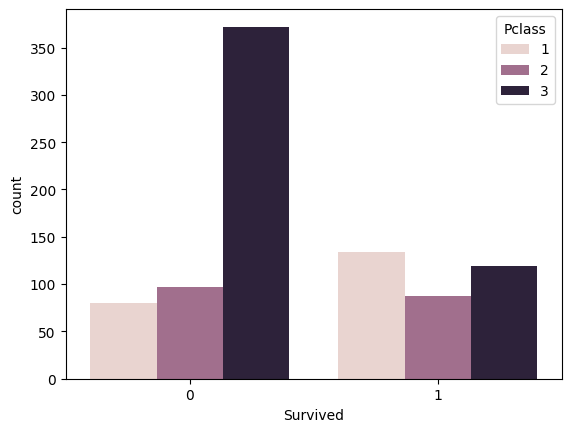

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [ ]:
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7921348314606742

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       117
           1       0.68      0.74      0.71        61

    accuracy                           0.79       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.80      0.79      0.79       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[96, 21],
       [16, 45]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,96,21
Real: Si,16,45


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
